In [15]:
results_name = 'ApplesOptions'

In [16]:
import sys; sys.path.append('../..')

from src.results import read_results
import datetime
import matplotlib as mpl
import pandas as pd

mpl.rcParams['figure.dpi'] = 100

orders = list(read_results.get_orders(results_name))

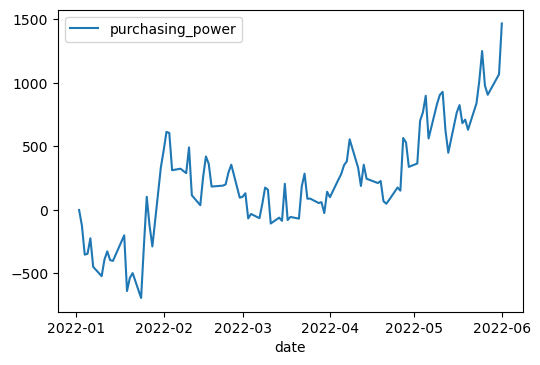

In [17]:
from src.risk import simulate_account

simulation_parameters = simulate_account.build_td_simulation()
pp_by_day = list(simulate_account.yield_last_by_date(simulate_account.yield_running_purchasing_power_with_settling(iter(orders), simulation_parameters)))
pp_by_day = [(pp_by_day[0][0] - datetime.timedelta(days=1), 0.)] + pp_by_day

pd.DataFrame(pp_by_day, columns=['date', 'purchasing_power']).set_index('date').plot()

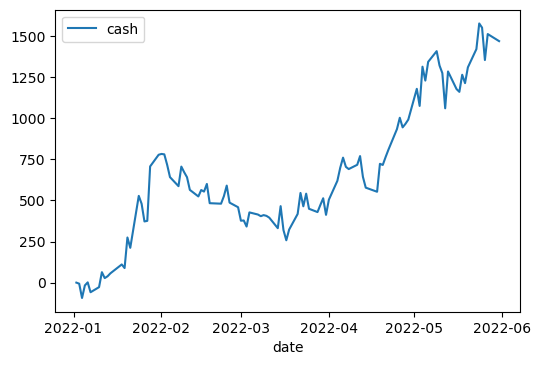

In [18]:
cash_by_day = list(simulate_account.yield_last_by_date((o.datetime, c) for o, c in simulate_account.simulate_account(iter(orders), 0, simulation_parameters)))
pd.DataFrame([(cash_by_day[0][0] - datetime.timedelta(days=1), 0.)] + cash_by_day, columns=['date', 'cash']).set_index('date').plot()